# COGS 108 - Final Project 

# Overview

We are exploring the phenomena known as home field advantage and tried to answer this question by exploring different aspects of the sports using datasets from the NBA, MLB, and NFL. We looked at win percentages and score differentials of home and away games and ran statistical tests to determine if there is a significant difference. We also looked at the average number of turnovers/errors committed by teams ant home vs away and also ran statistical tests to determine significance. 

# Names

- Eric Jiang
- Ben Hazarian 
- Gauthier Gris
- Bernard Suwirjo
- Cesar Reyes 

# Group Members IDs

- A########
- A########
- A########
- A########

# Research Question

*Fill in your research question here*

## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
# Necessary Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
# Display plots directly in the notebook instead of in a new window
%matplotlib inline

In [5]:
# NBA Dataset
nba_data = pd.read_csv('data/nba.games.stats.csv')
# MLB Dataset
mlb_data = pd.read_csv('data/baseball2016-2017.csv')
# NFL Dataset
NFL_data = pd.read_csv('data/nfl_16.csv')

# Data Cleaning

# NBA

In [9]:
#Original dataset
nba_data.head()

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,1,ATL,1,2014-10-29,Away,TOR,L,102,109,40,...,27,33,0.818,16,48,26,13,9,9,22
1,2,ATL,2,2014-11-01,Home,IND,W,102,92,35,...,18,21,0.857,11,44,25,5,5,18,26
2,3,ATL,3,2014-11-05,Away,SAS,L,92,94,38,...,27,38,0.711,11,50,25,7,9,19,15
3,4,ATL,4,2014-11-07,Away,CHO,L,119,122,43,...,20,27,0.741,11,51,31,6,7,19,30
4,5,ATL,5,2014-11-08,Home,NYK,W,103,96,33,...,8,11,0.727,13,44,26,2,6,15,29


In [10]:
#Convert 'Date' column to datetime objects
nba_data['Date'] = pd.to_datetime(nba_data['Date'])
#Grab data from only 2016-2017 season
one_season = nba_data.loc[(nba_data['Date'] >= '2016-10-25') & (nba_data['Date'] <= '2017-04-12')]
#Drop unnecessary columns
one_season = one_season.drop(columns = ['Date', 'Unnamed: 0'])
#Convert WINorLOSS column to binary (1 for win, 0 for loss)
one_season['WINorLOSS'] = one_season['WINorLOSS'].eq('W').mul(1)
#Cleaned dataset
one_season.head()

,Team,Game,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
4920,ATL,1,Home,WAS,1,114,99,44,88,0.500,...,13,18,0.722,12,40,25,14,4,19,20
4921,ATL,2,Away,PHI,1,104,72,42,85,0.494,...,11,15,0.733,4,39,16,9,5,20,20
4922,ATL,3,Home,SAC,1,106,95,33,79,0.418,...,13,19,0.684,6,38,26,10,6,19,34
4923,ATL,4,Home,LAL,0,116,123,41,85,0.482,...,18,20,0.900,11,42,24,11,9,15,25
4924,ATL,5,Away,WAS,0,92,95,32,83,0.386,...,28,35,0.800,11,46,13,7,3,19,23


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [15]:
#Group data by teams, and for each team, group by home and away
teams_ha = one_season.groupby(['Team', 'Home']).sum()
teams_ha.head()

Game  WINorLOSS  TeamPoints  OpponentPoints  FieldGoals  \
Team Home                                                            
ATL  Away  1685         20        4116            4190        1523   
     Home  1718         23        4343            4339        1600   
BOS  Away  1607         23        4367            4318        1566   
     Home  1796         30        4490            4323        1602   
BRK  Away  1745          7        4393            4718        1568   

           FieldGoalsAttempted  FieldGoals.  X3PointShots  \
Team Home                                                   
ATL  Away                 3416       18.282           366   
     Home                 3502       18.790           363   
BOS  Away                 3462       18.589           467   
     Home                 3516       18.718           518   
BRK  Away                 3469       18.595           442   

           X3PointShotsAttempted  X3PointShots.  ...  Opp.FreeThrows  \
Team Home                                        ...                   
ATL  Away                   1077         13.934  ...             637   
     Home                   1060         14.056  ...             643   
BOS  Away                   1366         13.975  ...             831   
     Home                   1376         15.433  ...             739   
BRK  Away                   1282         14.007  ...             818   

           Opp.FreeThrowsAttempted  Opp.FreeThrows.  Opp.OffRebounds  \
Team Home                                                              
ATL  Away                      831           31.849              424   
     Home                      827           31.965              452   
BOS  Away                     1089           31.459              418   
     Home                      953           31.671              465   
BRK  Away                     1041           32.379              441   

           Opp.TotalRebounds  Opp.Assists  Opp.Steals  Opp.Blocks  \
Team Home                                                           
ATL  Away               1810          894         366         196   
     Home               1788         1025         372         228   
BOS  Away               1822          892         300         201   
     Home               1830          959         323         224   
BRK  Away               1923         1010         375         237   

           Opp.Turnovers  Opp.TotalFouls  
Team Home                                 
ATL  Away            578             845  
     Home            629             923  
BOS  Away            556             830  
     Home            546             834  
BRK  Away            521             822  

[5 rows x 36 columns]

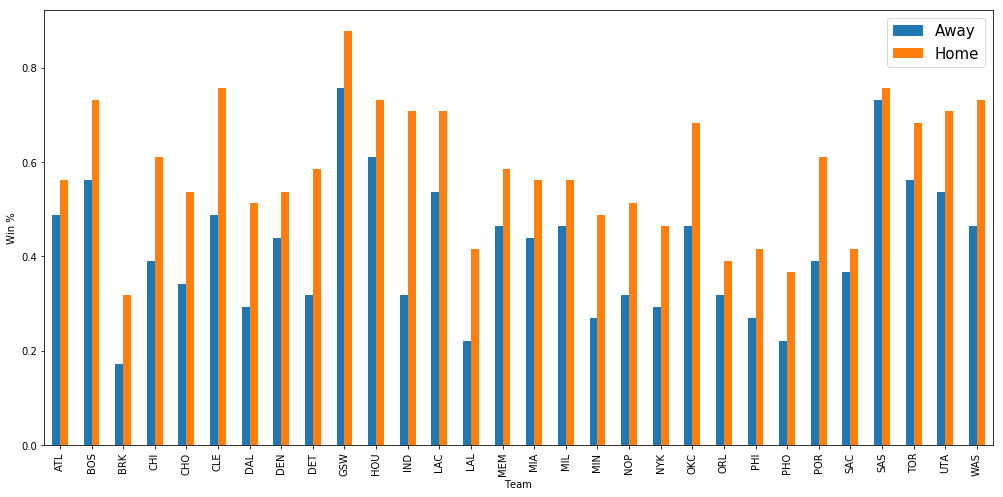

In [72]:
#Calculate win percentages for each team at home vs away
win_percentages = teams_ha['WINorLOSS']/41
#Plot bar chart comparing the percentages
win_percent_team = win_percentages.unstack().plot.bar(figsize=(17,8))
win_percent_team.set_ylabel("Win %")
win_percent_team.legend(prop={'size':15})

In [34]:
'''Calculate the number of teams that have a higher win percentage at home than away. Every was more likely
to win at home than they were on the road.'''
len(win_percentages.unstack().loc[win_percentages.unstack()['Home'] > win_percentages.unstack()['Away']])

30

In [19]:
#Grab columns necessary for score differential calculation
team_scores = one_season[['Team','WINorLOSS', 'Game', 'Home','TeamPoints', 'OpponentPoints']]
#Get wins ONLY
team_scores = team_scores[team_scores['WINorLOSS'] == 1]
#Get score differential in wins
team_scores['ScoreDiff'] = team_scores['TeamPoints'].sub(team_scores['OpponentPoints'], axis=0)
team_scores.head()

,Team,WINorLOSS,Game,Home,TeamPoints,OpponentPoints,ScoreDiff
4920,ATL,1,1,Home,114,99,15
4921,ATL,1,2,Away,104,72,32
4922,ATL,1,3,Home,106,95,11
4925,ATL,1,6,Home,112,97,15
4926,ATL,1,7,Away,110,106,4


In [21]:
#Group by team, and for each team, group by home and away. Grab the score differential column.
ha_win_score_diff = team_scores.groupby(['Team','Home']).mean()['ScoreDiff']
ha_win_score_diff.head()

Team  Home
ATL   Away     9.500000
      Home    10.130435
BOS   Away     8.869565
      Home     9.366667
BRK   Away    16.857143
Name: ScoreDiff, dtype: float64

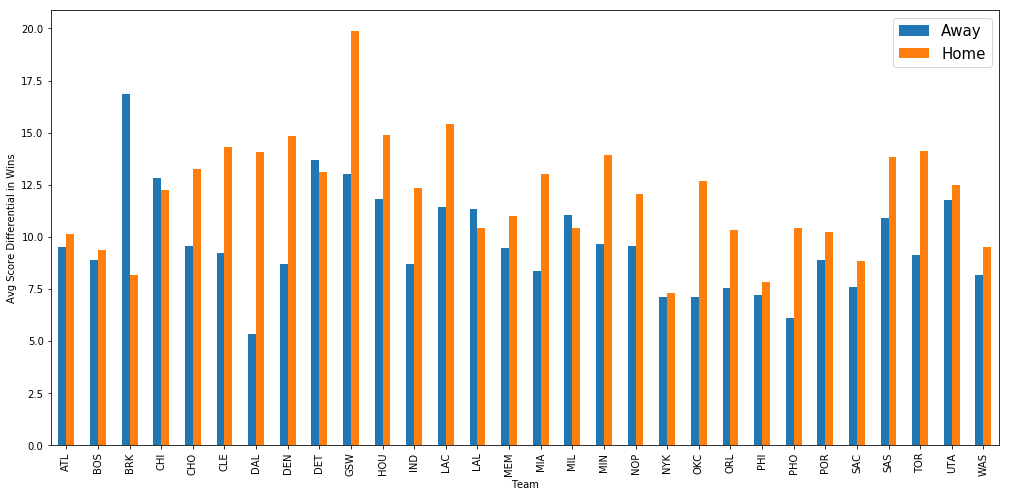

In [68]:
#Plot bar chart to compare score differential in home wins vs away wins
score_diff = ha_win_score_diff.unstack().plot.bar(figsize=(17,8))
score_diff.set_ylabel("Avg Score Differential in Wins")
score_diff.legend(prop={'size':15})

In [25]:
'''Calculate the number of teams with a higher score differential in home wins than away wins. 
25 teams won more comfortably at home than on the road. The other 5 teams did not perform to our 
expectations, so they were not considered in the analysis'''

df_ha = ha_win_score_diff.unstack()
len(df_ha.loc[df_ha['Home'] > df_ha['Away']])

25

In [26]:
#Calculate the average difference in score differential for home vs away
home_greater = df_ha.loc[df_ha['Home'] > df_ha['Away']]
home_greater['Home'].mean() - home_greater['Away'].mean()

3.25724297549729

In [35]:
'''Run t-test to see if there is a significant difference. The null hypothesis
states that there is no significant difference between the mean win score differential 
at home and the mean win score differential on the road. Our significance level is 0.05. 
Because our p-value is less than the significance level, we can reject the null hypothesis
and say that there is a significant difference. These 25 teams are winning more comfortably
at home than away.'''
stats.ttest_ind(home_greater['Home'], home_greater['Away'], equal_var = False)

Ttest_indResult(statistic=4.860888174640401, pvalue=1.7247253869154674e-05)

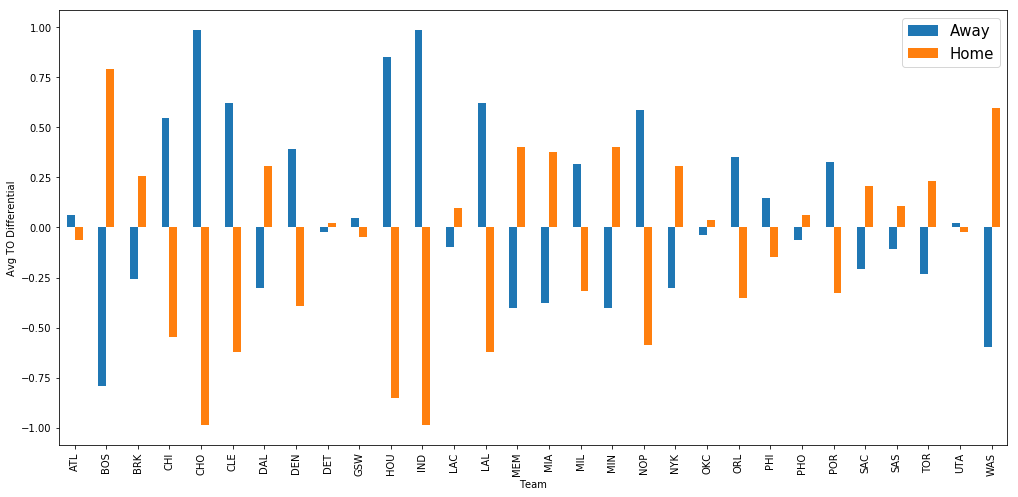

In [70]:
#find average TO per game split by home and away games for every team
to_ha = (teams_ha['Turnovers']/41).unstack()
#average TO per game, not split by home and away, for every team
avg_to = one_season.groupby('Team').sum()['Turnovers']/82
#calculates difference in average TO at home/away vs average TO overall
to_ha['Away TO Diff'] = to_ha['Away'].sub(avg_to, axis=0)
to_ha['Home TO Diff'] = to_ha['Home'].sub(avg_to, axis=0)
#drop unecessary columns
to_ha = to_ha.drop(columns=['Home', 'Away'])
#rename columns
to_ha = to_ha.rename(columns={'Home TO Diff': 'Home', 'Away TO Diff': 'Away'})
#plot bar chart to compare TO differential between home and away
to_plot = to_ha.plot.bar(figsize=(17,8))
to_plot.set_ylabel('Avg TO Differential')
to_plot.legend(prop={'size':15})

In [39]:
'''15 teams averaged 0.46 less TO's at home compared to their overall average TO on the season, for an overall 
difference of 0.45 less TO's'''
to_ha.loc[to_ha['Home TO Diff'] < 0].mean()['Home TO Diff']

-0.45853658536585384

In [40]:
'''15 teams averaged less TO's on the road compared to their overall average on the season, for an overall 
difference of 0.28 less TO's'''
to_ha.loc[to_ha['Away TO Diff'] < 0].mean()['Away TO Diff']

-0.28048780487804864

In [41]:
'''There are 15 teams that average less TO's at home than they do on the season, and 15 that average less 
TO's away than they do on the season. The null hypothesis states that there is no significant difference
between the home TO differential and the away TO differential. When running the t-test for a significant 
difference between the TO differences, I got a p-value of 0.087, which is greater than 0.05. Therefore, 
we cannot reject the null hypothesis and say that turnovers  are less frequent at home due to home court 
advantage.'''
stats.ttest_ind(to_ha.loc[to_ha['Away TO Diff'] < 0]['Away TO Diff'], 
                to_ha.loc[to_ha['Home TO Diff'] < 0]['Home TO Diff'], equal_var = False)

Ttest_indResult(statistic=1.7780215101087347, pvalue=0.08787410116740832)

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*